In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
np.random.seed(2343243)

In [3]:
mean_vc1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class1 = np.random.multivariate_normal(mean_vc1, cov_mat1, 100)

In [4]:
mean_vc2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class2 = np.random.multivariate_normal(mean_vc2, cov_mat2, 100)

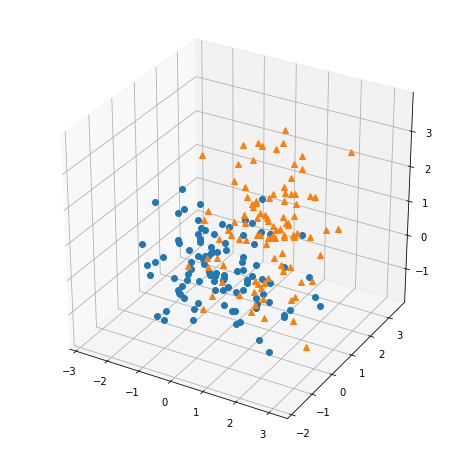

In [5]:
from mpl_toolkits.mplot3d import Axes3D, proj3d
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(class1[:, 0], class1[:, 1], class1[:, 2], 'o')
ax.plot(class2[:, 0], class2[:, 1], class2[:, 2], '^')
plt.show()

In [6]:
all_data = np.concatenate((class1, class2))

In [7]:
pca = PCA(n_components = 2)
transformed_data = pca.fit_transform(all_data)

In [8]:
pca.components_

array([[ 0.41124564,  0.64810013,  0.64097055],
       [ 0.91063567, -0.26106644, -0.32029202]])

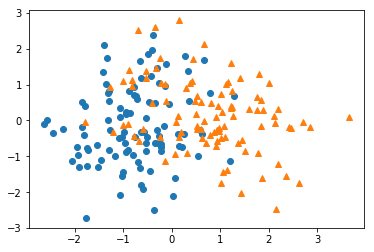

In [9]:
plt.plot(transformed_data[0:100, 0], transformed_data[0:100, 1], 'o')
plt.plot(transformed_data[100:200, 0], transformed_data[100:200, 1], '^')
plt.show()

In [10]:
all_data_t = all_data.T
cov = np.cov(all_data_t)

In [11]:
eig_val, eig_vectors = np.linalg.eig(cov)

In [12]:
eig_val_vector_pair = []
for i in range(len(eig_val)):
    eig_vec = eig_vectors[:, i]
    eig_val_vector_pair.append((eig_val[i], eig_vec))
eig_val_vector_pair.sort(reverse=True)